#**Board Level Strategic Insight Request**
## **Data Analyst**: Arabella Trixie C. Sabisol
## **Date of Request**: September 29, 2025

### **Executive Summary**

This report analyzes how customer attributes relate to loan amounts. The correlation analysis indicates that Credit Score, Employment History, Income, and Debt-to-Income Ratio are the most significant factors influencing loan size. In contrast, Age and Education Level show little to no meaningful impact. These findings provide actionable insights to enhance loan approval processes, strengthen risk management practices, and refine product offerings.

### **Introduction**

The Board of Directors commissioned this analysis to address observed inconsistencies in loan amounts granted across different customer segments and to reinforce the institution’s commitment to data-driven decision-making. The primary objective is to determine which customer attributes most strongly influence loan amounts, thereby providing clarity for developing more consistent approval policies and optimizing profitability strategies.

In [ ]:
%pip install qdesc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import qdesc as qd
from scipy.stats import pearsonr
import seaborn as sns

# **Data and Methodology**

### **Data**

- The dataset (HypotheticalLoansData.xlsx) contains information on 500 loan applicants. Each record includes key customer attributes, Income, Credit Score, Employment Years, Debt-to-Income Ratio, Age, Education Level, as well as the Loan Amount granted.

In [ ]:
loans_df = pd.read_excel('HypotheticalLoansData.xlsx')

In [ ]:
loans_df.head()

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29


In [ ]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           500 non-null    float64
 1   CreditScore      500 non-null    float64
 2   EmploymentYears  500 non-null    int64  
 3   DebtToIncome     500 non-null    float64
 4   Age              500 non-null    int64  
 5   EducationLevel   500 non-null    object 
 6   LoanAmount       500 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB


In [ ]:
loans_df.isnull().sum()

,0
Income,0
CreditScore,0
EmploymentYears,0
DebtToIncome,0
Age,0
EducationLevel,0
LoanAmount,0


In [ ]:
qd.desc(loans_df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Income,500.0,60102.57,14718.80,60191.96,9996.96,11380.99,117790.97,0.30,0.78
CreditScore,500.0,701.59,48.90,701.43,31.18,565.16,831.62,0.23,0.78
EmploymentYears,500.0,14.31,8.52,14.00,7.00,0.00,29.00,5.22,0.78
DebtToIncome,500.0,0.30,0.10,0.30,0.07,0.01,0.57,0.43,0.78
Age,500.0,42.54,12.71,42.50,11.50,21.00,64.00,6.43,0.78
LoanAmount,500.0,87561.53,13021.30,87579.97,9308.11,53960.78,119076.87,0.28,0.78


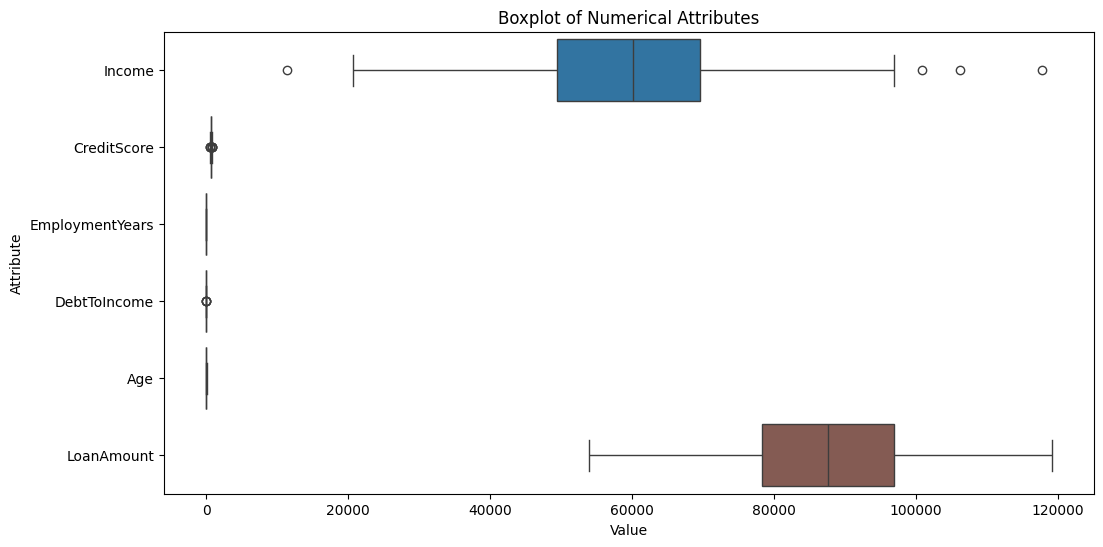

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=loans_df, orient='h')
plt.title("Boxplot of Numerical Attributes")
plt.xlabel("Value")
plt.ylabel("Attribute")
plt.show()


### **Methodology**

* The analysis employed Pearson correlation to assess the linear relationships between each numerical customer attribute and the loan amount. A significance level of α = 0.05 was applied, with p-values below this threshold considered statistically significant.

### **Justification**

* Pearson correlation was chosen because it quantifies both the strength and direction of linear relationships between continuous variables such as Income, Credit Score, Employment Years, Debt-to-Income Ratio, and Age, and the Loan Amount. Given that the dataset consists primarily of continuous financial and demographic attributes, this method offers a straightforward and reliable approach to identifying the key factors that most strongly influence loan amounts.

In [ ]:
numeric_df = loans_df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr(method='pearson')
display(correlation_matrix)

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,LoanAmount
Income,1.000000,-0.075671,-0.059628,0.103445,-0.016165,0.240972
CreditScore,-0.075671,1.000000,0.017494,0.001673,0.034752,0.343985
EmploymentYears,-0.059628,0.017494,1.000000,0.040090,-0.000016,0.308620
DebtToIncome,0.103445,0.001673,0.040090,1.000000,-0.042250,-0.211895
Age,-0.016165,0.034752,-0.000016,-0.042250,1.000000,-0.034823
LoanAmount,0.240972,0.343985,0.308620,-0.211895,-0.034823,1.000000


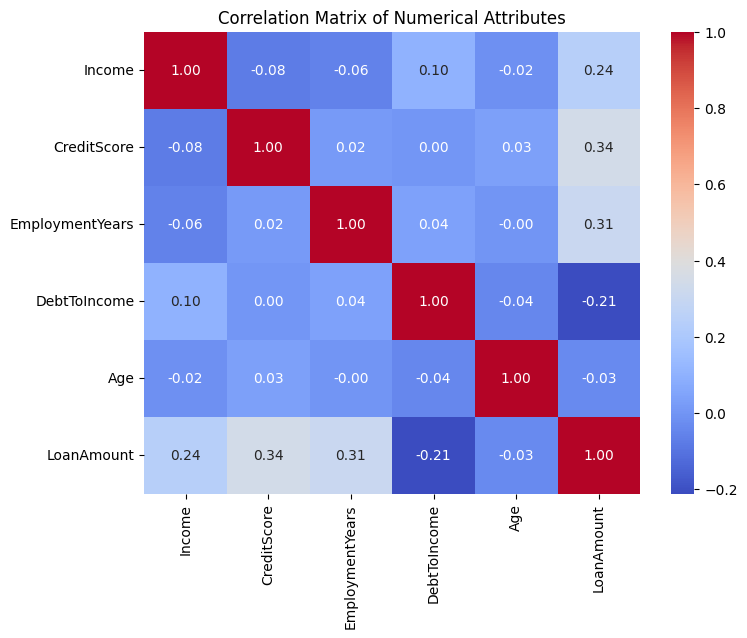

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [ ]:
qd.freqdist_a(loans_df)

,Column,Value,Count,Percentage
0,EducationLevel,Bachelor,196,39.2
1,EducationLevel,High School,143,28.6
2,EducationLevel,Master,108,21.6
3,EducationLevel,PhD,53,10.6


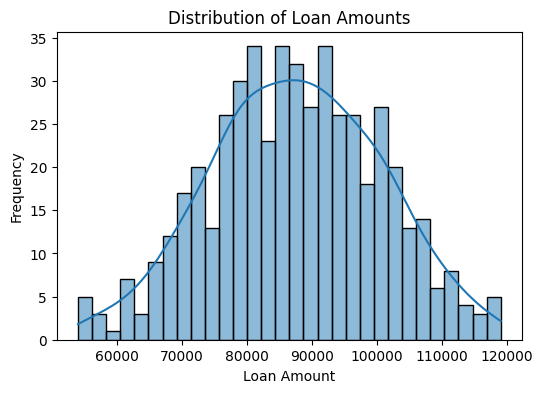

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(loans_df['LoanAmount'], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


# **Findings**

###  **Correlation Analysis**

The Pearson correlation analysis identified which customer attributes significantly influence the Loan Amount and which do not:

**Key Drivers of Loan Amount**

- **Credit Score (r = 0.344)** – The strongest positive predictor. Applicants with higher credit scores are typically granted larger loans.

- **Employment Years (r = 0.309)** – Longer employment history is associated with higher loan amounts.

- **Income (r = 0.241)** – Higher income corresponds to larger loan approvals.

- **Debt-to-Income Ratio (r = –0.212)** – Higher debt relative to income is linked to smaller loan amounts.

**Variables with Minimal Impact**

- **Age (r = –0.035)** – Shows no meaningful relationship with loan amounts.

- **Education Level** – Has negligible influence once financial factors are considered.

### **Summary Insight**

Financial attributes, Credit Score, Employment Years, Income, and Debt-to-Income Ratio, are the primary drivers of loan amounts, while demographic factors like Age and Education Level do not significantly affect loan decisions. These findings provide clear guidance for refining approval policies and risk management strategies.

# **Discussion of Implications**

**Loan Approvals**
- Credit Score, Employment Years, Income, and Debt-to-Income Ratio are the main drivers of loan amounts and should be prioritized in automated approval processes. Age and Education Level are less relevant for determining loan size.

**Risk Assessment**
- The positive correlations with Credit Score, Employment Years, and Income, along with the negative correlation with Debt-to-Income Ratio, provide reliable indicators for assessing loan risk and refining risk scoring models.

**Product Tailoring**
- Insights into these factors enable targeted product offerings. Higher loan products can be offered to applicants with strong credit profiles, while loans for those with higher debt-to-income ratios may require lower limits or adjusted terms.

Focusing on these key attributes allows the institution to implement more consistent, transparent, and data-driven lending policies, ensure loan amounts align with creditworthiness, and support sustainable portfolio growth.

# **Recommendations**

**Prioritize Key Attributes**
- Integrate Credit Score, Employment Years, Income, and Debt-to-Income Ratio into automated loan approval processes and risk assessment models, as these are the strongest predictors of loan amounts.

**Tailor Loan Products and Marketing**
- Develop and market loan products targeted to customer segments defined by Credit Score, Employment Years, Income, and Debt-to-Income Ratio to maximize profitability and manage risk effectively.